In [1]:
import numpy as np
import random
random.seed(7)
from gridworld import *

In [2]:
NUM_RUNS = 10
MAX_NUM_STEPS_PER_EPISODE = 10000
NUM_EPISODES = 20000
STEP_SIZE = 0.001
TARGET_POLICY = (
    {"up": 0, "down": 0, "right": 0, "left": 0}, # Terminal state
    {"up": 0, "down": 0, "right": 0, "left": 1},
    {"up": 0, "down": 0, "right": 0, "left": 1},
    {"up": 0, "down": 0, "right": 0, "left": 1},
    {"up": 1, "down": 0, "right": 0, "left": 0},
    {"up": 1, "down": 0, "right": 0, "left": 0},
    {"up": 1, "down": 0, "right": 0, "left": 0},
    {"up": 0, "down": 1, "right": 0, "left": 0},
    {"up": 1, "down": 0, "right": 0, "left": 0},
    {"up": 0, "down": 1, "right": 0, "left": 0},
    {"up": 0, "down": 1, "right": 0, "left": 0},
    {"up": 0, "down": 1, "right": 0, "left": 0},
    {"up": 0, "down": 0, "right": 1, "left": 0},
    {"up": 0, "down": 0, "right": 1, "left": 0},
    {"up": 0, "down": 0, "right": 1, "left": 0}
)
environment = Environment()
results = []

In [3]:
# n-step TD off-policy (n=3)
rms_error_per_episode_sum = np.zeros(NUM_EPISODES)
for run in range(NUM_RUNS):
    V, rms_error_per_episode = run_n_step_td_off_policy(environment, TARGET_POLICY, NUM_EPISODES, MAX_NUM_STEPS_PER_EPISODE, STEP_SIZE, 3)
    rms_error_per_episode_sum += rms_error_per_episode
results.append(rms_error_per_episode_sum / NUM_RUNS)
V

array([ 0.        , -0.99366415, -1.99889273, -2.99941854, -0.99335245,
       -1.99710258, -2.99759589, -1.99837963, -1.99844329, -2.99871837,
       -1.99663941, -0.99305328, -2.99785256, -1.99827922, -0.99302542])

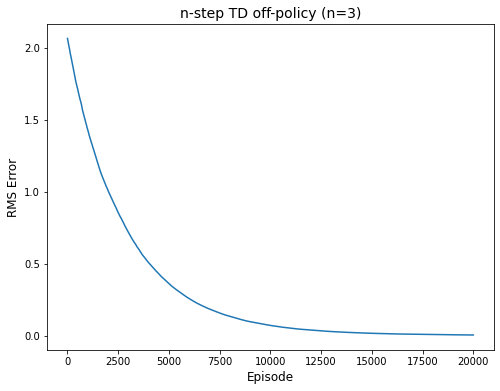

In [4]:
plot_progress(results[0], (8, 6), "n-step TD off-policy (n=3)")

In [5]:
# n-step TD off-policy with control variates (n=3)
rms_error_per_episode_sum = np.zeros(NUM_EPISODES)
for run in range(NUM_RUNS):
    V, rms_error_per_episode = run_n_step_td_off_policy_control_variates(environment, TARGET_POLICY, NUM_EPISODES, MAX_NUM_STEPS_PER_EPISODE, STEP_SIZE, 3)
    rms_error_per_episode_sum += rms_error_per_episode
results.append(rms_error_per_episode_sum / NUM_RUNS)
V

array([ 0., -1., -2., -3., -1., -2., -3., -2., -2., -3., -2., -1., -3.,
       -2., -1.])

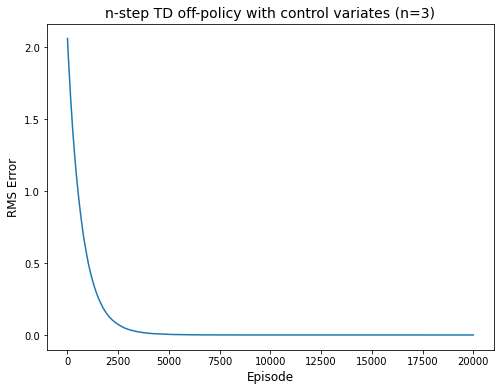

In [6]:
plot_progress(results[1], (8, 6), "n-step TD off-policy with control variates (n=3)")

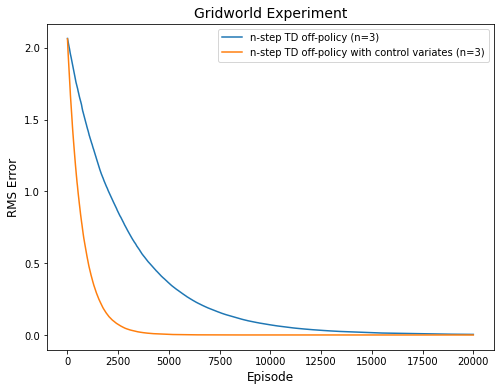

In [7]:
plot_results((8, 6), results,
    (
    "n-step TD off-policy (n=3)",
    "n-step TD off-policy with control variates (n=3)"
    )
)